In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.model_selection import cross_val_score

In [37]:
############# Load dataset ##############
house_ds = pd.read_csv("Housing.csv")
house_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [38]:
############# Label Encoding & get_dummies ##############
le = LabelEncoder()
house_ds["guestroom_binary"] = le.fit_transform(house_ds["guestroom"])
house_ds["mainroad_binary"] = le.fit_transform(house_ds["mainroad"])
house_ds["basement_binary"] = le.fit_transform(house_ds["basement"])
house_ds["hotwaterheating_binary"] = le.fit_transform(house_ds["hotwaterheating"])
house_ds["airconditioning_binary"] = le.fit_transform(house_ds["airconditioning"])
house_ds["prefarea_binary"] = le.fit_transform(house_ds["prefarea"])

house_ds=house_ds.drop(["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"],axis=1)
house_ds=house_ds.join(pd.get_dummies(house_ds["furnishingstatus"],dtype=int))
house_ds=house_ds.drop("furnishingstatus",axis=1)

In [39]:
house_ds.head(10)

,price,area,bedrooms,bathrooms,stories,parking,guestroom_binary,mainroad_binary,basement_binary,hotwaterheating_binary,airconditioning_binary,prefarea_binary,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,0,1,0,0,1,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,0,0,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,1,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1,0,0
5,10850000,7500,3,3,1,2,0,1,1,0,1,1,0,1,0
6,10150000,8580,4,3,4,2,0,1,0,0,1,1,0,1,0
7,10150000,16200,5,3,2,0,0,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,0,1


In [40]:
X = house_ds.drop("price", axis=1)
y = house_ds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
############# KNN ##############
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
print(f"KNN score : {round(knn.score(X_test,y_test), 2)}")

KNN score : 0.34


In [42]:
############# Min Max Scaler ##############
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaledMinMax = scaler.fit_transform(X_train)
X_test_scaledMinMax = scaler.fit_transform(X_test)
knn.fit(X_train_scaledMinMax,y_train)
print(f"Min Max Scaler score : {round(knn.score(X_test_scaledMinMax,y_test), 2)}")

Min Max Scaler score : 0.52


In [43]:
############# Standard Scaler ##############
scaler = StandardScaler()
X_train_scaledStd = scaler.fit_transform(X_train)
X_test_scaledStd = scaler.transform(X_test)
knn.fit(X_train_scaledStd,y_train)
print(f"Standard Scaler score : {round(knn.score(X_test_scaledStd,y_test), 2)}")

Standard Scaler score : 0.62


In [44]:
############# KNN Accuracies ##############
train_accuracies = {}
test_accuracies = {}
rmse_knn_arr = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    y_pred=knn.predict(X_test)
    mse_knn= MSE(y_test, y_pred)
    rmse_knn = mse_knn**(1/2)
    rmse_knn_arr[neighbor] = rmse_knn

print(rmse_knn_arr)
print(test_accuracies)

{1: 1978449.9932115257, 2: 1852975.2027741724, 3: 1805019.2029105932, 4: 1805724.9566702282, 5: 1745470.849403842, 6: 1767128.121179406, 7: 1778453.6996887203, 8: 1812647.1547950304, 9: 1804467.9103242313, 10: 1790634.5895363342, 11: 1811359.946154149, 12: 1825075.2651234856, 13: 1824825.5160603279, 14: 1834110.9363925369, 15: 1827997.0264389513, 16: 1837325.6676864908, 17: 1827714.5276682419, 18: 1839571.9102812428, 19: 1843118.6949734685, 20: 1841953.4079698296, 21: 1836965.920313203, 22: 1836006.8115193052, 23: 1836852.3780942198, 24: 1833108.172117439, 25: 1840595.0210160604}
{1: 0.15059583013178046, 2: 0.2549190693440827, 3: 0.29298620683400256, 4: 0.2924332208150664, 5: 0.3388660887544288, 6: 0.3223580093323216, 7: 0.31364411798666025, 8: 0.2869979462663207, 9: 0.29341801602429674, 10: 0.30421001656979285, 11: 0.2880102299105335, 12: 0.2771872712409834, 13: 0.27738508165867837, 14: 0.27001248171818415, 15: 0.2748711182932141, 16: 0.26745127315702955, 17: 0.27509522389744967, 18: 

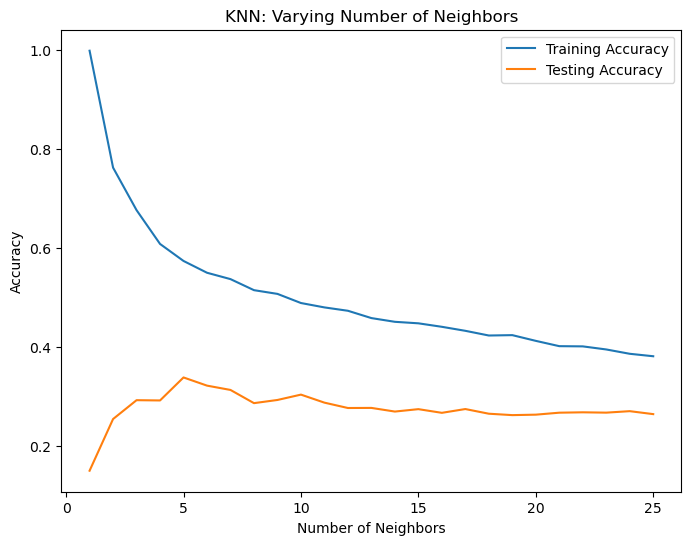

In [45]:
############# KNN Accuracies Plot ##############
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [46]:
############# Override previous accuracies => KNN Scaled Accuracies ##############
train_accuracies = {}
test_accuracies = {}
rmse_knn_arr = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(X_train_scaledStd, y_train)
    train_accuracies[neighbor] = knn.score(X_train_scaledStd, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaledStd, y_test)
    y_pred=knn.predict(X_test_scaledStd)
    mse_knn= MSE(y_test, y_pred)
    rmse_knn = mse_knn**(1/2)
    rmse_knn_arr[neighbor]=rmse_knn

print(rmse_knn_arr)
print(test_accuracies)

{1: 1638079.187010664, 2: 1396978.8375127213, 3: 1353072.4444758147, 4: 1377222.0733305125, 5: 1320346.6062114974, 6: 1339262.2043571703, 7: 1339652.58874317, 8: 1348087.59792981, 9: 1349130.320224208, 10: 1354604.8073224914, 11: 1371929.5148142441, 12: 1353515.5244531368, 13: 1351334.4582922354, 14: 1354651.0952317542, 15: 1356985.2952032206, 16: 1365575.358081941, 17: 1368975.1565866666, 18: 1379370.2687102505, 19: 1390017.3780266012, 20: 1384097.354410789, 21: 1389925.01677647, 22: 1393989.8383746145, 23: 1400229.9702705857, 24: 1407898.0632598195, 25: 1413214.8612237482}
{1: 0.4177171244147476, 2: 0.5765092900498132, 3: 0.6027111901612923, 4: 0.5884030168783512, 5: 0.6216966907068884, 6: 0.6107797217479778, 7: 0.6105527793847708, 8: 0.6056330968568076, 9: 0.6050227890450639, 10: 0.6018108165802087, 11: 0.5915604094970249, 12: 0.6024509534839899, 13: 0.6037311488661956, 14: 0.6017836032415308, 15: 0.6004100871670672, 16: 0.5953350627036441, 17: 0.5933176099986432, 18: 0.587117994896

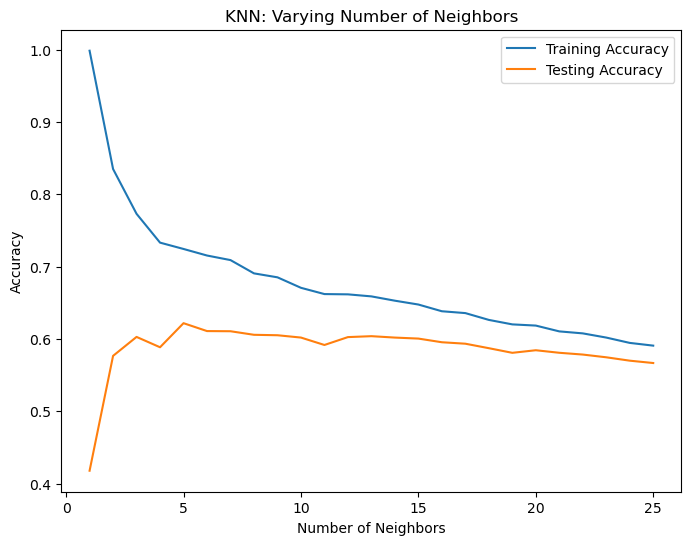

In [47]:
############# KNN Scaled Accuracies Plots ##############
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [48]:
############# KNN Scaled Score ##############
knn_scaled_score = knn.score(X_test_scaledStd, y_test)
print(f"KNN Scaled Score : {round(knn_scaled_score, 2)}")

y_pred = knn.predict(X_test_scaledStd)
mse_knn = MSE(y_test, y_pred)
rmse_knn = mse_knn**(1/2)
print(f"RMSE : {round(rmse_knn, 2)}")

KNN Scaled Score : 0.57
RMSE : 1413214.86


In [49]:
############# Cross-Validation ##############
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaledStd, y_train)
knn_cv_scores = cross_val_score(knn, X_train_scaledStd, y_train, cv=5)

print(f"Cross-Validation scores : {knn_cv_scores}")
print(f"Cross-Validation mean : {round(np.mean(knn_cv_scores), 2)}")
print(f"Cross-Validation highest score : {round(np.max(knn_cv_scores), 2)}")

Cross-Validation scores : [0.48623336 0.27715472 0.76913972 0.57747508 0.55883118]
Cross-Validation mean : 0.53
Cross-Validation highest score : 0.77
